In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import Video

In [3]:
def lorentz(q,v,B,E):
    return q * (E + np.cross(v,B) )

In [46]:
q=-1
v = np.array([0,0,0])
B = np.array([0,0,-1])
E = np.array([-1,0,0])

dt = .01
t = np.arange(0,20,dt)
r = np.array([0,0,0])

vlist = []
rlist = []
for tt in t:
    vlist.append(v)
    rlist.append(r)
    F = lorentz(q,v,B,E)
    v = v + F * dt
    r = r + v * dt

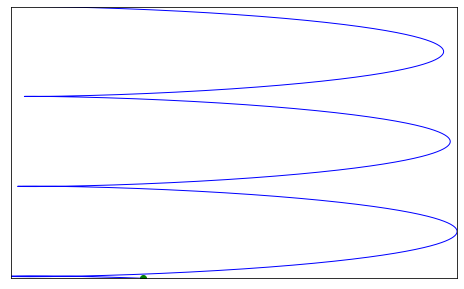

In [50]:
rlist = np.array(rlist)

fname = "lorentz_1.mp4"

fig = plt.figure(figsize=(8,5))
ax = plt.gca()
ax.set_xlim(rlist[:,0].min(),rlist[:,0].max())
ax.set_ylim(rlist[:,1].min(),rlist[:,1].max())
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
path, = ax.plot([],[],c='blue',lw=1)
particle = ax.scatter([],[],c='green')
#ax.set_aspect('equal')

def init():
    path.set_data( [],[] )
    particle.set_offsets( np.array( [[],[]]).T )
    return path,particle

def animate(i):
    path.set_data(rlist[:i,0],rlist[:i,1])
    particle.set_offsets(np.array( [[rlist[i,0]],[rlist[i,1]]] ).T)
    return path,particle

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=rlist[:,0].size, interval=5, blit=True)

anim.save(fname)

In [40]:
rlist[:,0].max()

141.65625845136887

In [31]:
rlist[:5,1]

array([ 0.000000e+00,  0.000000e+00, -1.000000e-07, -4.000000e-07,
       -9.999999e-07])